<a href="https://colab.research.google.com/github/juhi31/wd/blob/main/ML_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
dataset= data.values
X = dataset[:,0:8]
Y = dataset[:,8]
print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [ ]:
#from keras.utils import np_utils
#pip install np_utils
from keras.utils import to_categorical
encoded_y = to_categorical(Y)
encoded_y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_training, X_testing, Y_training, Y_testing = train_test_split(X_scale, encoded_y, test_size=0.2, random_state=10)
X_training, X_valid, Y_training, Y_valid = train_test_split(X_training, Y_training, test_size=0.2, random_state=10)
print(len(X_training))
print(len(X_testing))
print(len(X_valid))

491
154
123


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Creating the model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()   #gives a summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 230 (920.00 Byte)
Trainable params: 230 (920.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
 from tensorflow.keras import optimizers
opt=optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
 hist = model.fit(X_training, Y_training,batch_size=8,  epochs=200, validation_data=(X_valid,Y_valid))

Epoch 1/200
62/62 [==============================] - 1s 7ms/step - loss: 0.7243 - accuracy: 0.3523 - val_loss: 0.7118 - val_accuracy: 0.4065
Epoch 2/200
62/62 [==============================] - 0s 3ms/step - loss: 0.7095 - accuracy: 0.3849 - val_loss: 0.7017 - val_accuracy: 0.4715
Epoch 3/200
62/62 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.4868 - val_loss: 0.6937 - val_accuracy: 0.5285
Epoch 4/200
62/62 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.6130 - val_loss: 0.6875 - val_accuracy: 0.5772
Epoch 5/200
62/62 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.6578 - val_loss: 0.6822 - val_accuracy: 0.5854
Epoch 6/200
62/62 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.6660 - val_loss: 0.6777 - val_accuracy: 0.6260
Epoch 7/200
62/62 [==============================] - 0s 4ms/step - loss: 0.6677 - accuracy: 0.6701 - val_loss: 0.6741 - val_accuracy: 0.6260
Epoch 8/200
6

<Figure size 640x480 with 0 Axes>

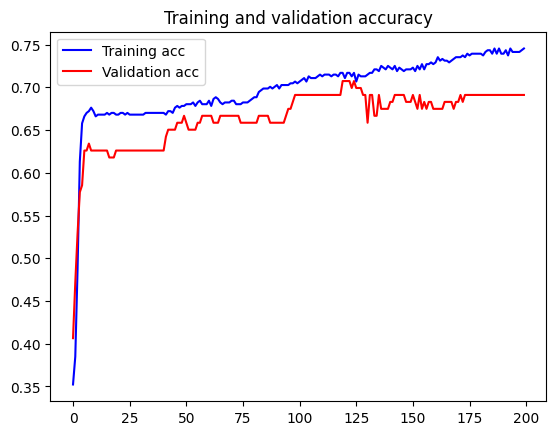

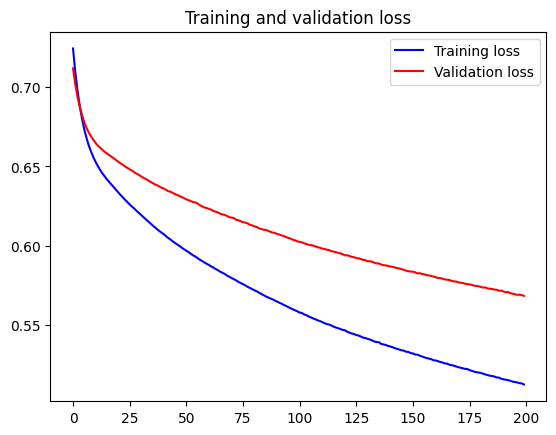

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('custom_trainvalacc.png')
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

#plt.show()
plt.savefig('custom_trainvalloss.png')
plt.figure()

In [ ]:
res =model.evaluate(X_testing, Y_testing)

5/5 [==============================] - 0s 3ms/step - loss: 0.5838 - accuracy: 0.6558


In [ ]:
test=X_testing[0]
y_act=Y_testing[0]
result=model.predict(test.reshape(1,8))
result

1/1 [==============================] - 0s 99ms/step


array([[0.48862845, 0.5113715 ]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.round(result)
print("Actual:"+ str(y_act))
print("Predicted:"+str(y_pred))

Actual:[1. 0.]
Predicted:[[0. 1.]]
